## 1. Visualización de una Serie de Tiempo

De la web del BCRP obtenga la evolución del Índice Generalizado de la Bolsa de Valores de Lima (IGBVL), el precio del cobre y el precio del petróleo, en términos mensuales. Con ello realice lo siguiente:

__1.1.	Gráfique las 3 variables__

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm


from scipy.stats import t
from datetime import date

C:\Users\josed\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\josed\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Importar datos
df = pd.read_excel(r".\_data\IGBVL.xlsx")
# Generación de serie tipo fecha y asignación de índice
df["date"] = pd.date_range(start='2000-01',
                           end='2024-07',
                           freq = "M")
df = df.set_index("date")
df.head(5)

,Fecha,IGBVL,Cobre,Petróleo
date,,,,
2000-01-31,Ene00,1822.55,83.702308,27.297000
2000-02-29,Feb00,1806.68,81.377604,29.372857
2000-03-31,Mar00,1663.07,78.937399,29.841739
2000-04-30,Abr00,1626.71,76.290042,25.800500
2000-05-31,May00,1461.69,80.970676,28.830435


In [3]:
# Escalado de serie
df["scld_igbvl"]  = (df["IGBVL"] / df["IGBVL"].iloc[0])*100
df["scld_cooper"] = (df["Cobre"] / df["Cobre"].iloc[0])*100
df["scld_oil"]    = (df["Petróleo"] / df["Petróleo"].iloc[0])*100

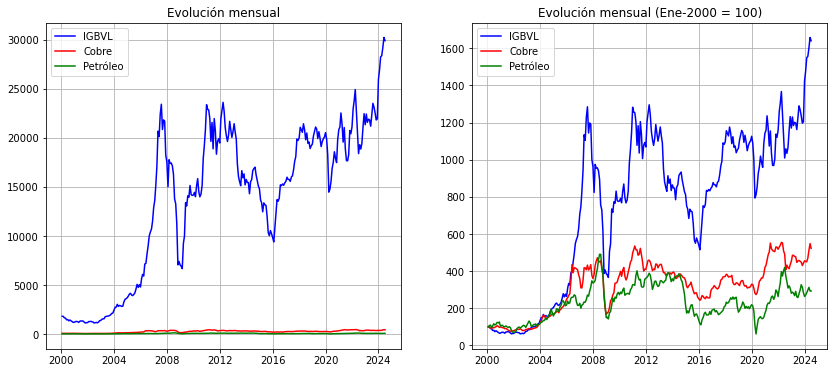

In [4]:
# Interfaz del gráfico
fig, axs = plt.subplots(1,2, figsize=(14, 6))

# Primer plot: Serie en Nivel
axs[0].plot(df["IGBVL"], color='b')
axs[0].plot(df["Cobre"], color='r')
axs[0].plot(df["Petróleo"], color='g')

axs[0].grid(which='major')
axs[0].set_title("Evolución mensual")
axs[0].legend(['IGBVL','Cobre', 'Petróleo' ])

# Primer plot: Serie escalada
axs[1].plot(df["scld_igbvl"], color='b')
axs[1].plot(df["scld_cooper"], color='r')
axs[1].plot(df["scld_oil"], color='g')

axs[1].grid(which='major')
axs[1].set_title("Evolución mensual (Ene-2000 = 100)")
axs[1].legend(['IGBVL','Cobre', 'Petróleo' ])

__1.2. Gráfique el logaritmo de las 3 variables__

In [5]:
# Generación de logaritmos
df["log_igbvl"]  = np.log(df["IGBVL"])
df["log_cooper"] = np.log(df["Cobre"])
df["log_oil"]    = np.log(df["Petróleo"])

# Escalando logaritmos
df["scld_ln_igbvl"]  = (df["log_igbvl"] / df["log_igbvl"].iloc[0])*100
df["scld_ln_cooper"] = (df["log_cooper"] / df["log_cooper"].iloc[0])*100
df["scld_ln_oil"]    = (df["log_oil"] / df["log_oil"].iloc[0])*100

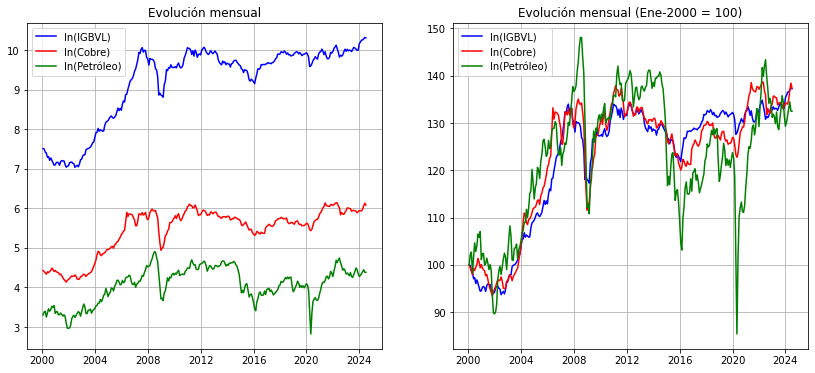

In [6]:
# Interfaz del gráfico
fig, axs = plt.subplots(1,2, figsize=(14, 6))

# Primer plot: Serie en Nivel
axs[0].plot(df["log_igbvl"], color='b')
axs[0].plot(df["log_cooper"], color='r')
axs[0].plot(df["log_oil"], color='g')

axs[0].grid(which='major')
axs[0].set_title("Evolución mensual")
axs[0].legend(['ln(IGBVL)','ln(Cobre)', 'ln(Petróleo)' ])

# Primer plot: Serie escalada
axs[1].plot(df["scld_ln_igbvl"], color='b')
axs[1].plot(df["scld_ln_cooper"], color='r')
axs[1].plot(df["scld_ln_oil"], color='g')

axs[1].grid(which='major')
axs[1].set_title("Evolución mensual (Ene-2000 = 100)")
axs[1].legend(['ln(IGBVL)','ln(Cobre)', 'ln(Petróleo)' ])

Pese a que la serie y su logaritmo han sido escalados en el mismo punto de referencia hay un comportamieto distinto de las series. Esto se debe al componente exponencial que puede tener la serie de tiempo

$$y_{t} = He^{rt}$$
$$\ln y_{t} = \ln H + rt$$

Por ello al escalar solo la serie tenemos
$$\dfrac{y_{t}}{y_{n}} = \dfrac{He^{rt}}{He^{rn}} = e^{r(t-n)}$$

y al escalar el logaritmo
$$ \dfrac{\ln y_{t}}{\ln y_{n}} = \dfrac{\ln H + rt}{\ln H + rn}  = r(t-n)$$

__1.3. Grafique la primera diferencia y la primera diferencia anual, ambas por logaritmos, de la serie IGBVL. ¿Cual es el comportamiento distinto que encuentra?__

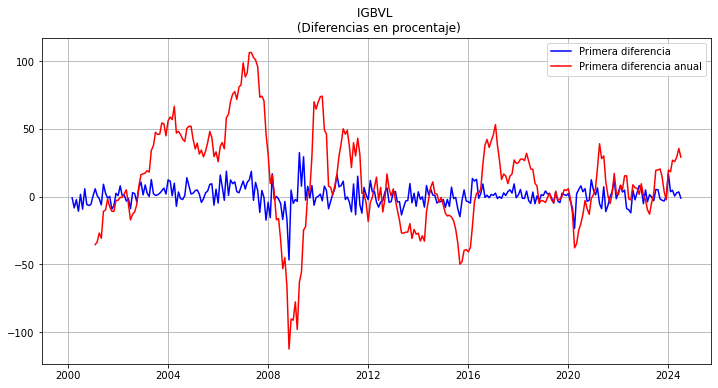

In [7]:
df["d_igbvl"] = df["log_igbvl"].diff()*100
df["d12_igbvl"] = df["log_igbvl"].diff(12)*100

# Grtáfico
fig, axs = plt.subplots(figsize=(12, 6))

axs.plot(df["d_igbvl"], color='b')
axs.plot(df["d12_igbvl"], color='r')

axs.grid(which='major')
axs.set_title("IGBVL \n (Diferencias en procentaje)")
plt.legend(['Primera diferencia','Primera diferencia anual' ])

<p style="text-align: justify;"> La primera diferencia nos muestra el cambio porcentual de un mes respecto al mes anterior, mientras que la diferencia anual nos muestra el cambio porcentual del mes actual contra el mismo mes del año anterior. El primer tipo de diferencia suele ser más util para ver la volatilidad de retornos de un activo cuando tenemos una frecuencia diaria. Mientras que la diferencia anual nos ayuda a capturar mejor los ciclos económicos. </p>

__1.4.	Grafique la primera diferencia anual por logaritmos y cambio porcentual, de la serie IGBVL. ¿Qué diferencias encuentra? ¿Por qué?__

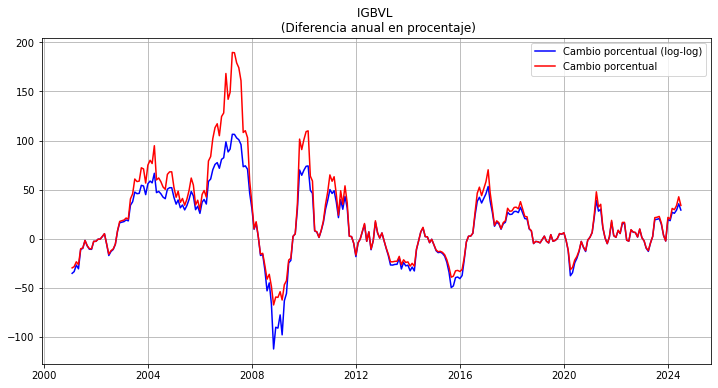

In [8]:
df["d12_igbvl"] = df["log_igbvl"].diff(12)*100
df["pct12_igbvl"]= df["IGBVL"].pct_change(periods=12)*100

# Gráfico
fig, axs = plt.subplots(figsize=(12, 6))

axs.plot(df["d12_igbvl"], color='b')
axs.plot(df["pct12_igbvl"], color='r')

axs.grid(which='major')
axs.set_title("IGBVL \n (Diferencia anual en procentaje)")
plt.legend(['Cambio porcentual (log-log)','Cambio porcentual' ])

<p style="text-align: justify;"> Podemos observar que hay diferencias entre calcular el cambio porcentual como la diferencia de logaritmos y como un cambio porcentual normal. Esta diferencia se debe a que el calculo por logaritmos es una aproximación alrededor de una tasa de crecimiento de cero </p>

La serie de tiempo pueden tener el siguiente comportamiento

$$y_{t} = He^{rt}$$
$$\ln y_{t} = \ln H + rt$$

De ello si tomamos logaritmo al cociente de la serie hoy respecto de ayer tenemos

$$ \ln \left(\dfrac{y_{t}}{y_{t-1}} \right) = \ln \left(\dfrac{He^{rt}}{He^{r(t-1)}}\right) = \ln \left(e^{r}\right) = r$$

Por otra parte el cambio porcentual tenemos

$$\Delta \% = \dfrac{y_{t} - y_{t-1}}{y_{t-1}}-1 = \dfrac{y_{t}}{y_{t-1}}-1 \Longrightarrow (1+ \Delta \%) = \dfrac{y_{t}}{y_{t-1}}$$

Tomando logaritmo al cambio a esta última expresión llegariamos a lo obtenido por el logaritmo de $(y_{t}/y_{t-1})$

$$\ln (1+ \Delta \% y_{t}) = r$$

Si hacemos una aproximación de Taylor en el lado izquierdo alrededor de $\Delta \%^{*} = 0$ tenemos

$$\ln (1+\Delta \%) \approx \ln(1+\Delta \%^{*}) + \dfrac{1}{1+\Delta \%^{*}}(\Delta \% -\Delta \%^{*} )$$

$$\ln (1+\Delta \%) \approx \ln(1) + \dfrac{1}{1}(\Delta \% )$$

$$\ln (1+\Delta \%) \approx \Delta \% $$

Por lo tanto diferencia entre la diferencia como cambio porcentual y como logaritmos se debe a que esta última es una aproximación en un entorno cercano a cero
$$r \approx \Delta \%$$

## 2. Regresión Lineal

Tome en cuenta la primera diferencial anual de las variables de interés: IGBVL, Cobre y Petróleo; con el fin de estimar el siguiente modelo

$$IGBVL_{t} = \beta_{0} + \beta_{1} Cobre_{t} + \beta_{2} Pretróleo_{t} + \epsilon_{t}$$

__2.1. Estime el modelo por MCO__

El modelo en mención puede simplificarse de forma matricial
$$y = X \beta + \epsilon$$

de manera que podamos estimar matircialmente $\beta$
$$\hat{\beta} = (X'X)^{-1}X'y$$

In [9]:
# Datos en diferencias
df["pct12_igbvl"]= df["IGBVL"].pct_change(periods=12)*100
df["pct12_cooper"]= df["Cobre"].pct_change(periods=12)*100
df["pct12_oil"]= df["Petróleo"].pct_change(periods=12)*100

# Intercepto
intercept = np.ones(len(df)-12)

# Matriz X
X_aux = np.asarray(df[["pct12_cooper","pct12_oil"]].iloc[12:])
X     = np.c_[intercept, X_aux]

# Vector y
y = np.asarray(df["pct12_igbvl"].iloc[12:])

# Estimación MCO
# @ es el operador numpy de multiplicación matricial
β_ols = np.linalg.inv(X.T @ X) @ (X.T @ y)
β_ols

array([11.09131382,  0.95618376, -0.15382079])

__2.2. Estime el modelo por máxima verosimilitud__

$$\epsilon = y - X \beta,~~~ \sigma^{2}=\dfrac{\epsilon '\epsilon}{T-k}$$

$$\mathcal{L}(y|X,\beta) = \prod_{t=1}^{T} \dfrac{1}{\sqrt{2\pi \sigma^{2}}} e^{-\dfrac{1}{2\sigma^{2}}(y - X \beta)'(y - X \beta)}$$

$$l(y|X,\beta) = -\dfrac{T}{2}\ln(2\pi \sigma^{2}) - \dfrac{1}{2} \sum_{t=1}^{T} \dfrac{(y - X \beta)'(y - X \beta)}{\sigma^{2}}$$

In [10]:
def neg_log_l(params, *args):
    
    b = params
    y, X_aux = args
    t = y.size
    k = X_aux.shape[1] + 1
    ϵ = np.zeros(t)
    l = np.zeros(t)
    for i in range(0, t):
        ϵ[i] = y[i] - b[0] - b[1]*X_aux[i,0] - b[2]*X_aux[i,1]

    σ_2 = (ϵ.T @ ϵ)/(t-k)

    for i in range(0, t):
        l[i] = -0.5*np.log(2*np.pi*σ_2)-0.5*(ϵ[i]*ϵ[i])/σ_2

    log_l = -np.sum(l)
    return log_l

In [11]:
import scipy.optimize as opt
β_ml = opt.fmin(neg_log_l,        # Función objetivo
                       0.1*np.ones(3),    # Valores iniciales
                       args = (y, X_aux)) # Argumentos
β_ml

Optimization terminated successfully.
         Current function value: 1395.306892
         Iterations: 142
         Function evaluations: 258


array([11.09133531,  0.95618543, -0.15382032])

__2.3. Estime el modelo mediante la libreria `statsmodels` de Python__

In [12]:
import statsmodels.api as sm
#fit linear regression model
model = sm.OLS(y, X).fit()

#view model summary
print(model.summary())

#dir(model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     97.58
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           7.41e-33
Time:                        15:44:24   Log-Likelihood:                -1395.3
No. Observations:                 282   AIC:                             2797.
Df Residuals:                     279   BIC:                             2808.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0913      2.165      5.123      0.0

## 3. Prueba de Hipótesis

En una economía basada en la exportación de materias primas, el precio de sus productos de exportación, como el cobre, tiene un impacto positivo en sus ingresos. Por otro lado, el precio de los insumos, como el petróleo, influye negativamente a través del canal de los costos. En nuestro análisis del IGBVL, examinaremos el rol del precio del petróleo.

__3.1. Realice una prueba de significancia (dos colas) sobre $\beta_{2}$__


$$H_{0}:\beta_{2} = a_{2}$$
$$H_{0}:\beta_{2} \neq a_{2}$$

In [13]:
# Datos preeliminares de la regresion MCO
ϵ      = y - (X @ β_ols)         # Errores
t      = y.size                  # Tamaño de muestra 
k      = X.shape[1]              # Variables independientes
σ_2    = (ϵ.T @ ϵ)/(t-k)         # Estimador de varianza de los errores
dof    = (t-k)                   # Grados de libertad   
inv_XX = np.linalg.inv(X.T @ X)  # Inversa de la matriz (X'X)

In [14]:
# Estadístico t
a2    = 0                            # Punto de comparación
t_β2  = (β_ols[2] - a2)/np.sqrt(σ_2*inv_XX[2,2]) # t-stat

In [15]:
# T crítico y comparación
t_crit_2tail = sp.stats.t.ppf(0.975, dof)

print("T-stat:{:.3f}".format(t_β2))
print("T-crit:{:.3f}".format(t_crit_2tail))

T-stat:-2.369
T-crit:1.969


In [16]:
# P-valor
if t_β2 >= 0:
    p_val = 2*(1 - sp.stats.t.cdf(t_β2, dof))
elif t_β2 < 0:
    p_val = 2*(sp.stats.t.cdf(t_β2, dof))

print("p-val(manual):{:.3f}".format(p_val))

# P-valor: Otra forma
p_value_2 = sp.stats.t.cdf(t_β2, dof)*2 
print("p-val(fórmula):{:.3f}".format(p_value_2))

p-val(manual):0.019
p-val(fórmula):0.019


Graficamente en la prueba de hipótesis tenemos

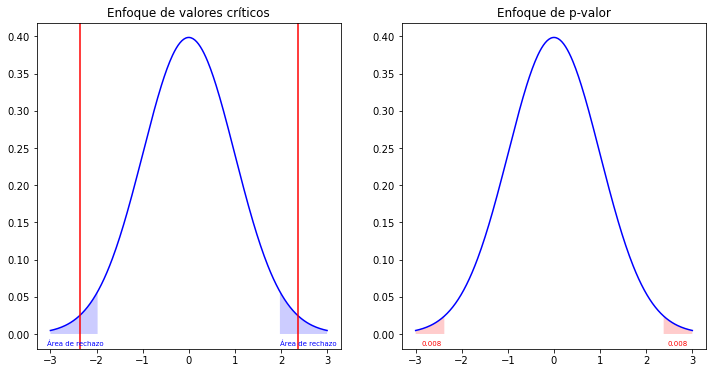

In [17]:
# Interfaz del gráfico
fig, axs = plt.subplots(1,2, figsize=(12, 6))

# Distribución t-student
x = np.linspace(-3, 3, num=300)
f = sp.stats.t.pdf(x, dof, loc=0, scale=1)


# Áreas de rechazo
axs[0].plot(x,f, color='b')
axs[0].fill_between(x,f,
                 where = (x <= -t_crit_2tail) | (t_crit_2tail <= x),
                 color='blue',
                 edgecolor="b",
                 lw=0,
                 alpha=.2)

axs[0].text(-t_crit_2tail-1.1, -0.015, 'Área de rechazo', fontsize = 7, color='b')
axs[0].text(t_crit_2tail, -0.015, 'Área de rechazo', fontsize = 7, color='b')

axs[0].axvline(t_β2, color = 'r')
axs[0].axvline(-t_β2, color = 'r')
axs[0].title.set_text('Enfoque de valores críticos')


# P-Valor
axs[1].plot(x,f, color='b')
axs[1].fill_between(x,f,
                 where = (x <= -abs(t_β2)) | (abs(t_β2) <= x),
                 color='red',
                 edgecolor="b",
                 lw=0,
                 alpha=.2)

axs[1].text(-t_crit_2tail-0.9, -0.015, '0.008', fontsize = 7, color='r')
axs[1].text(t_crit_2tail+0.5, -0.015, '0.008', fontsize = 7, color='r')
axs[1].title.set_text('Enfoque de p-valor')

__3.2. Realice una prueba a una cola izquierda sobre $\beta_{2}$__

$$H_{0}: \beta_{2} = a_{2}$$
$$H_{1}: \beta_{2} < a_{2}$$

In [18]:
# Estadístico t
a2    = 0                            # Punto de comparación
t_β2  = (β_ols[2] - a2)/np.sqrt(σ_2*inv_XX[2,2]) # t-stat

In [19]:
# T crítico
t_crit_left_tail = sp.stats.t.ppf(0.05, dof)

# P valor: 
p_value = sp.stats.t.cdf(t_β2, dof)

print("T-stat:{:.3f}".format(t_β2))
print("T-crit:{:.3f}".format(t_crit_left_tail))
print("p-val:{:.3f}".format(p_value))

T-stat:-2.369
T-crit:-1.650
p-val:0.009


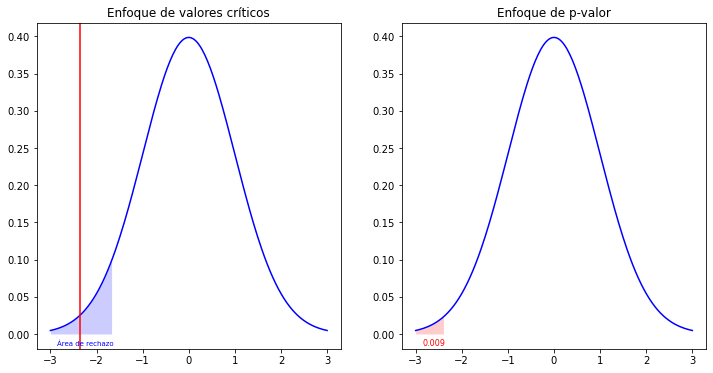

In [20]:
# Interfaz del gráfico
fig, axs = plt.subplots(1,2, figsize=(12, 6))

# Distribución t-student
x = np.linspace(-3, 3, num=200)
f = sp.stats.t.pdf(x, dof, loc=0, scale=1)

# Primer plot: t-stat
axs[0].plot(x,f, color='b')
# Áreas de rechazo
axs[0].fill_between(x,f,
                 where = (x <= t_crit_left_tail),
                 color='blue',
                 edgecolor="b",
                 lw=0,
                 alpha=.2)

axs[0].axvline(t_β2, color = 'r')
axs[0].text(t_crit_left_tail-1.2, -0.015, 'Área de rechazo', fontsize = 7, color='b')
axs[0].title.set_text('Enfoque de valores críticos')

# Segundo plot: P-valor
axs[1].plot(x,f, color='b')
axs[1].fill_between(x,f,
                 where = (x <= t_β2),
                 color='red',
                 edgecolor="r",
                 lw=0,
                 alpha=.2)
axs[1].text(t_crit_left_tail-1.2, -0.015, '0.009', fontsize = 8, color='r')
axs[1].title.set_text('Enfoque de p-valor')

__3.3. Realice una prueba a una cola derecha sobre $\beta_{2}$__

$$H_{0}: \beta_{2} = a_{2}$$
$$H_{1}: \beta_{2} > a_{2}$$

In [21]:
# Estadístico t
a2    = 0                            # Punto de comparación
t_β2  = (β_ols[2] - a2)/np.sqrt(σ_2*inv_XX[2,2]) # t-stat

In [22]:
# T crítico
t_crit_right_tail = sp.stats.t.ppf(0.95, dof)

# P valor: 
p_value = 1-sp.stats.t.cdf(t_β2, dof)

print("T-stat:{:.3f}".format(t_β2))
print("T-crit:{:.3f}".format(t_crit_right_tail))
print("p-val:{:.3f}".format(p_value))

T-stat:-2.369
T-crit:1.650
p-val:0.991


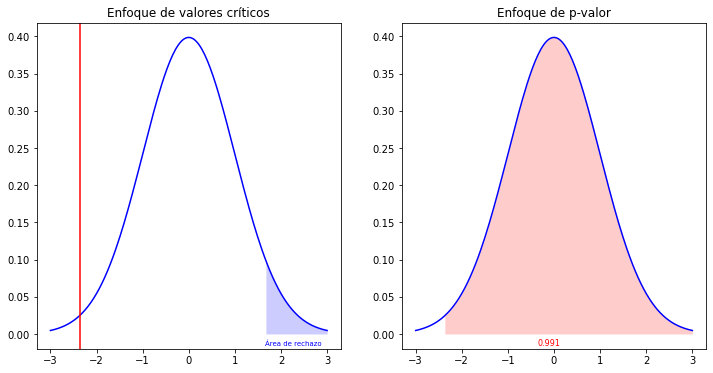

In [23]:
# Interfaz del gráfico
fig, axs = plt.subplots(1,2, figsize=(12, 6))

# Distribución t-student
x = np.linspace(-3, 3, num=200)
f = sp.stats.t.pdf(x, dof, loc=0, scale=1)

# Primer plot: t-stat
axs[0].plot(x,f, color='b')
# Áreas de rechazo
axs[0].fill_between(x,f,
                 where = (x >= t_crit_right_tail),
                 color='blue',
                 edgecolor="b",
                 lw=0,
                 alpha=.2)

axs[0].axvline(t_β2, color = 'r')
axs[0].text(t_crit_right_tail, -0.015, 'Área de rechazo', fontsize = 7, color='b')
axs[0].title.set_text('Enfoque de valores críticos')

# Segundo plot: P-valor
axs[1].plot(x,f, color='b')
axs[1].fill_between(x,f,
                 where = (x >= t_β2),
                 color='red',
                 edgecolor="r",
                 lw=0,
                 alpha=.2)
axs[1].text(t_crit_right_tail-2, -0.015, '0.991', fontsize = 8, color='r')
axs[1].title.set_text('Enfoque de p-valor')

__3.4. Realice una prueba de significancia conjunta__

$$H_{0}: \beta_{1}=0,~ \beta_{2}=0$$
$$H_{1}: \mathrm{al~menos~una~igualdad~no~se~cumple}$$

Para esta prueba se utiliza el estadístico $F$, del cual podemos aprovechar su relación directa con el $R^{2}$ para calcularlo

$$F = \dfrac{R^{2}/(k-1)}{(1-R^{2})/(t-k)}$$

In [24]:
# Estadístico F
F = (model.rsquared/(k-1))/((1-model.rsquared)/(t-k))
# Valor crítico
F_crit = sp.stats.f.ppf(0.95, dfn=(k-1), dfd=(t-k))

print("F-stat:{:.3f}".format(F))
print("F-crit:{:.3f}".format(F_crit))

F-stat:97.582
F-crit:3.028
